In [1]:
import pandas as pd
import re

In [2]:
import nltk
nltk.download('punkt', quiet=True)
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
nltk.download('wordnet', quiet=True)
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger', quiet=True)

True

In [3]:
# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = text.lower()
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7F]+',r' ', text) # replace non-ASCII characters
    text = re.sub('\s\s+', ' ', text)  # remove extra whitespace
    return text

In [4]:
stop_words_tl = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang",
 "apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil",
 "dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa",
 "ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba",
 "ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas",
 "ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila",
 "kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan",
 "katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat",
 "lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami",
 "marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na",
 "nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan",
 "ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano",
 "pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan",
 "panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta",
 "sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad",
 "tungkol","una","walang", "po"]

In [5]:
stop_words_tl = set(stop_words_tl)

In [6]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
stop_words_en=set(stopwords)

In [7]:
#removing english and tagalog stopwords
from nltk.tokenize import word_tokenize

def removing_en_stopwords(text):
    tokens = word_tokenize(text)
    text = [word for word in tokens if not word in stop_words_tl if not word in stop_words_en]
    return text

In [8]:
#Convert list to String
def listToString(s): 
    str1 = ""
    for ele in s:
        str1 = str1 + " " + ele
    return str1

In [9]:
from nltk.corpus import stopwords

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
      if word.lower() not in set(stopwords.words('english')):
        newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [10]:
#import Lemmatizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [11]:
#Sentiment analysis using TextBlob
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [12]:
import ipyvuetify as v
from bqplot import pyplot as plt
import ipywidgets as widgets
import numpy as np
from IPython.display import display, clear_output
from ipyvuetify.extra import FileInput


In [13]:
# EXAMPLE VARS
np.random.seed(0)
n = 2000
x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n)*10).astype(int)

In [14]:
lorem_ipsum = "Lorem ipsum dolor sit amet, consectetur adipiscing elit."

In [15]:
fig_hist = plt.figure(title='Histogram')
hist = plt.hist(y , bins=25)

In [16]:
uploaded_data = pd.DataFrame()
df4 = pd.DataFrame()

In [17]:
file_input = FileInput()

upload_btn = v.Btn(color='primary', children=['Upload CSV'])
submit_btn = v.Btn(color='primary', children=['SUBMIT'])
all_btn = v.Btn(color='primary', style_='margin: 5px', children=['All'])
subject_btn = v.Btn(color='primary', style_='margin: 5px', children=['Subject'])
teacher_btn = v.Btn(color='primary', style_='margin: 5px', children=['Teacher'])
search_btn = v.Btn(color='primary', children=['Search'])

upload_error = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])
count_text_total = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])
count_text_subjects = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])
count_text_teachers = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])

count_graph_display1 = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])
count_graph_display2 = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])

result_label = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])
result_analysis = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])

btn_display = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])
search_display = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])

graph_display1 = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])
graph_display2 = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])
graph_display3 = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])

text_result1 = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])
text_result2 = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])
text_result3 = v.Html(tag='div', class_='d-flex flex-row justify-center', children=[''])

search_field = v.TextField(label='Search for a subject or teacher', placeholder='Search', v_model='')


In [18]:
def count_data(df, count_type):
    if (count_type == 'total'):
        return len(df.index)
    elif (count_type == 'subject'):
        return df['Subject'].nunique()
    elif (count_type == 'teacher'):
        return df['Teacher'].nunique()

In [19]:
import nltk
from nltk.corpus import stopwords

def clean_data(df):
    df['Cleaned_Text'] = df['Text'].apply(clean)
    df.sort_values('Text', inplace = True)
    duplicates = df.pivot_table(columns=['Text'], aggfunc='size')
    
    df['removed_stopwords'] = df.Cleaned_Text.apply(lambda x: removing_en_stopwords(x))
    df2 = pd.DataFrame(columns=['removed_stopwords'])
    df2 = df.copy()
    
    df2['cleaned_texts'] = df.removed_stopwords.apply(lambda x:listToString(x))
    del df2['removed_stopwords']
    
    df2.sort_values('cleaned_texts', inplace=True, ascending = True)
    nan_value = float("NaN")
    df2['cleaned_texts'].replace("", nan_value, inplace=True)
    df2.dropna(subset = ["cleaned_texts"], inplace=True)

    return df2

In [20]:
def do_sentiment_analysis(df2):
    global df4
    from nltk.tokenize import word_tokenize
    from nltk import pos_tag
    from nltk.corpus import stopwords
    from nltk.corpus import wordnet
    import nltk

    pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
    df2['POS tagged'] = df2['cleaned_texts'].apply(token_stop_pos)
    
    from nltk.stem import WordNetLemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()
    df2['Lemma'] = df2['POS tagged'].apply(lemmatize)
    
    fin_data = pd.DataFrame(df2[['cleaned_texts', 'Lemma']])
    
    fin_data['Text_Blob Polarity'] = fin_data['Lemma'].apply(getPolarity) 
    fin_data['Text_Blob'] = fin_data['Text_Blob Polarity'].apply(analysis)
    
    tb_counts2 = fin_data.Text_Blob.value_counts()
    data = [df2['cleaned_texts'], df2["Subject"], df2["Teacher"], fin_data['Text_Blob']]
    df4 = pd.concat(data, axis=1)
    return [tb_counts2]

In [21]:
def do_blob_bar(tb_counts2):
    x = ["Neutral", "Positive", "Negative"]
    blob_y = [tb_counts2[0], tb_counts2[1], tb_counts2[2]]
    
    from bqplot import (
    OrdinalScale, LinearScale, Bars, Lines, Axis, Figure
    )

    x_data = x

    x_ord = OrdinalScale()
    y_sc = LinearScale()

    bar = Bars(x=x_data, y=blob_y, scales={'x': x_ord, 'y':
    y_sc}, type='stacked')

    ax_x = Axis(scale=x_ord, grid_lines='solid', label='Sentiment')
    ax_y = Axis(scale=y_sc, orientation='vertical', tick_format='0.2f',
                grid_lines='solid', label='Count')

    blob_bar = Figure(marks=[bar], axes=[ax_x, ax_y], title='Text Blob',
           legend_location='bottom-right')
    return blob_bar

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def do_sub_bar(df):
    fig = sns.countplot(x ='Teacher',hue = "Text_Blob", data = df)
    fig

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def do_tea_bar(df):
    fig = sns.countplot(x ='Subject',hue = "Text_Blob", data = df)
    fig

In [24]:
page = v.Html(tag='div', class_='d-flew flex-column', children=[
    # Title row
    v.Html(tag='div', class_='d-flex flex-row justify-center', children=[
        v.Html(
            tag='h1',
            children=['KAIROS']
        ),
    ]),

    v.Html(tag='div', class_='d-flex flex-row justify-center', children=[
        v.Html(
            tag='h3',
            children=['Faculty Evaluation']
        ),
    ]),
    
    v.Html(tag='div', class_='d-flex flex-row justify-center', style_='margin: 20px', children=[
        file_input,
    ]),
    
    v.Html(tag='div', class_='d-flex flex-row justify-center', style_='margin: 0', children=[
        upload_error,
    ]),

    v.Html(tag='div', class_='d-flex flex-row justify-center', style_='margin: 20px', children=[
        upload_btn,
    ]),

    v.Html(tag='div', class_='d-flex flex-row justify-center', children=[
        count_text_total,
    ]),
    
    v.Html(tag='div', class_='d-flex flex-row justify-center', children=[
        count_text_subjects,
    ]),
    
    v.Html(tag='div', class_='d-flex flex-row justify-center', children=[
        count_text_teachers,
    ]),
 
    v.Html(tag='div', class_='d-flex flex-row justify-center', style_='margin: 10px', children=[
        submit_btn,
    ]),
    
    v.Html(tag='div', class_='d-flex flex-row justify-center', children=[
        count_graph_display1,
        count_graph_display2
    ]),
    
    v.Html(tag='div', class_='d-flex flex-row justify-center', style_='margin: 20px', children=[
        btn_display
    ]),
    
#     v.Html(tag='div', class_='d-flex flex-row justify-center', style_='margin-left: 20px, margin-right: 20px', children=[
#         search_display
#     ]),
    
#     v.Html(tag='div', class_='d-flex flex-row justify-center', children=[
#         graph_display1
#     ]),

#     v.Html(tag='div', class_='d-flex flex-row justify-center', children=[
#         result_label,
#     ]),
    
#     v.Html(tag='div', class_='d-flex flex-row justify-center', children=[
#         result_analysis,
#     ]),
])


In [25]:
def initialize_data(df):
    global uploaded_data
    uploaded_data = df.copy()

In [26]:
def on_click_upload(widget, event, data):
    upload_error.children=[""]
    count_graph_display1.children=[""]
    count_graph_display2.children=[""]
    btn_display.children=[""]
    search_display.children=[""]
    graph_display1.children=[""]
    result_label.children=[""]
    result_analysis.children=[""]
    
    myfiles = file_input.get_files()
    if (len(myfiles) == 0):
        upload_error.children=[
            v.Html(
                tag='p',
                children=['Please select a file above before uploading']
            ),
        ]
    elif (len(myfiles) > 1):
        upload_error.children=[
            v.Html(
                tag='p',
                style_='color:red;',
                children=['Please select only ONE file'],
            ),
        ]
    else:
        data_file_name = myfiles[0]['name']
        df = pd.read_csv(data_file_name, header = None, encoding='utf-8')
        df.columns=['Text', 'Subject', 'Teacher']

        total_count = count_data(df, 'total')
        subject_count = count_data(df, 'subject')
        teacher_count = count_data(df, 'teacher')

        count_text_total.children=[f'{total_count} comments']
        count_text_subjects.children=[f'{subject_count} subjects']
        count_text_teachers.children=[f'{teacher_count} teachers']

        initialize_data(df)


In [27]:
def on_click_submit(widget, event, data):
    global uploaded_data
    cleaned_data = clean_data(uploaded_data)
    tb_counts = do_sentiment_analysis(cleaned_data)
    blob_bar = do_blob_bar(tb_counts[0])
    
    count_graph_display2.children=[blob_bar]
    btn_display.children=[subject_btn, teacher_btn]
    search_display.children=[search_field, search_btn]
    graph_display1.children=[fig_hist, fig_hist, fig_hist]
    result_label.children=['Result Analysis']
    result_analysis.children=[
        v.Html(
            tag='p',
            style_='font-weight: bold; background-color:yellow; padding: 20px',
            children=[lorem_ipsum],
    )]
#     uploaded_data = cleaned_data

In [28]:
# def on_click_all(widget, event, data):
#     graph_display1.children=[fig_hist, fig_hist]
#     result.children=['TOPIC']
#     topic_result.children=['All']

In [29]:
def on_click_subject(widget, event, data):
    global df4
    do_sub_bar(df4)
#     graph_display1.children=[v1]
#     result_label.children=['Result Analysis']
#     result_analysis.children=[
#         v.Html(
#             tag='p',
#             style_='font-weight: bold; background-color:yellow; padding: 20px',
#             children=[lorem_ipsum],
#     )]

In [30]:
def on_click_teacher(widget, event, data):
    global df4
    do_tea_bar(df4)
#     result_label.children=['Result Analysis']
#     result_analysis.children=[
#         v.Html(
#             tag='p',
#             style_='font-weight: bold; background-color:yellow; padding: 20px',
#             children=[lorem_ipsum],
#     )]
#     result.children=['TOPIC']
#     topic_result.children=['Teacher']

In [31]:
# def on_click_search(widget, event, data):
#     graph_display1.children=[fig_hist, fig_hist]
#     result_label.children=['Result Analysis']
#     result_analysis.children=[
#         v.Html(
#             tag='p',
#             style_='font-weight: bold; background-color:yellow; padding: 20px',
#             children=[lorem_ipsum],
#     )]
# #     result.children=['TOPIC']
# #     topic_result.children=[search_field.v_model]

Html(children=[Html(children=[Html(children=['KAIROS'], tag='h1')], class_='d-flex flex-row justify-center', t…

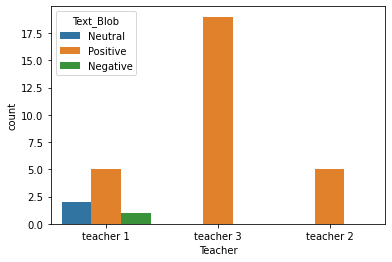

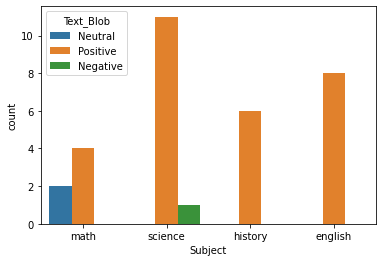

In [32]:
upload_btn.on_event('click', on_click_upload)
submit_btn.on_event('click', on_click_submit)
# all_btn.on_event('click', on_click_all)
subject_btn.on_event('click', on_click_subject)
teacher_btn.on_event('click', on_click_teacher)
# search_btn.on_event('click', on_click_search)

display(page)